# Data Exploration

## Import all necessary libraries

In [1]:
#!fc-list :lang=zh family

In [2]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', 10)
plt.rcParams['font.sans-serif'] = ['Noto Sans Mono CJK TC', 'sans-serif'] 
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

## Load Data

In [3]:
try:
    from google.colab import drive

    # Mount the folder "drive" on google drive to Colab Notebook
    drive.mount('/content/drive')
    path = '/content/drive/My Drive/wids-taipei/2020-WiDS-Taipei-MLCC-Workshop/dataset/*.csv'
except ModuleNotFoundError:
    path = '../data/*.csv'

### Read data

In [4]:
# Read data
filenames = glob.glob(path)
pd_dict = {}

for filename in filenames:
    name = filename.split("/")[-1].split(".")[0]
    pd_dict[name] = pd.read_csv(os.path.join(filename))

purchase_data = pd_dict['customer_purchase_dataset']    
analysis_input =  pd_dict['customer_analysis_input']

## Data Exploration

- customer_purchase_dataset
- customer_analysis_input

### Customer Purchase Dataset

- customer_unique_id: unique identifier of a customer
- product_sub_category
- product_main_category
- price: item price
- count: number of items include in the same order.

In [5]:
# 236835 rows × 5 columns
purchase_data

,customer_unique_id,product_sub_category,product_main_category,price,count
0,7ad04c71bfca958e6f2ec44bce34e2da,books_technical,書籍,24.0,1
1,4e58455924b97da4c44477abb0b030a5,cool_stuff,休閒生活,44.9,1
2,1f44054faaecb5ba43ca49625fb81767,auto,3C,24.8,1
3,d8764626d0d43e3f4fb34db9021a46ef,kitchen_dining_laundry_garden_furniture,家居生活,9.6,1
4,960438e3b93de6c449d45491534855a2,computers_accessories,3C,89.8,1
...,...,...,...,...,...
236830,305adb7f869f2d07fa2170b042abefdf,bed_bath_table,家居生活,137.9,1
236831,49edfe73ea287d715eebfced06b0bea9,auto,3C,139.0,1
236832,d87cc9520e3fd47ef88f7098e51afe8a,health_beauty,保健,325.0,1
236833,738ffcf1017b584e9d2684b36e07469c,fashion_underwear_beach,服飾/配件,155.0,1


In [6]:
purchase_data.dtypes

customer_unique_id        object
product_sub_category      object
product_main_category     object
price                    float64
count                      int64
dtype: object

In [7]:
purchase_data.isnull().sum()

customer_unique_id          0
product_sub_category     1567
product_main_category       0
price                       0
count                       0
dtype: int64

In [8]:
purchase_data.product_sub_category = purchase_data.product_sub_category.fillna('other')
purchase_data.isnull().sum()

customer_unique_id       0
product_sub_category     0
product_main_category    0
price                    0
count                    0
dtype: int64

In [9]:
purchase_data.describe()

,price,count
count,236835.000000,236835.0
mean,161.052777,1.0
std,373.447874,0.0
min,0.850000,1.0
25%,39.990000,1.0
50%,79.900000,1.0
75%,149.000000,1.0
max,6735.000000,1.0


#### Visualize

Total main categories:  14


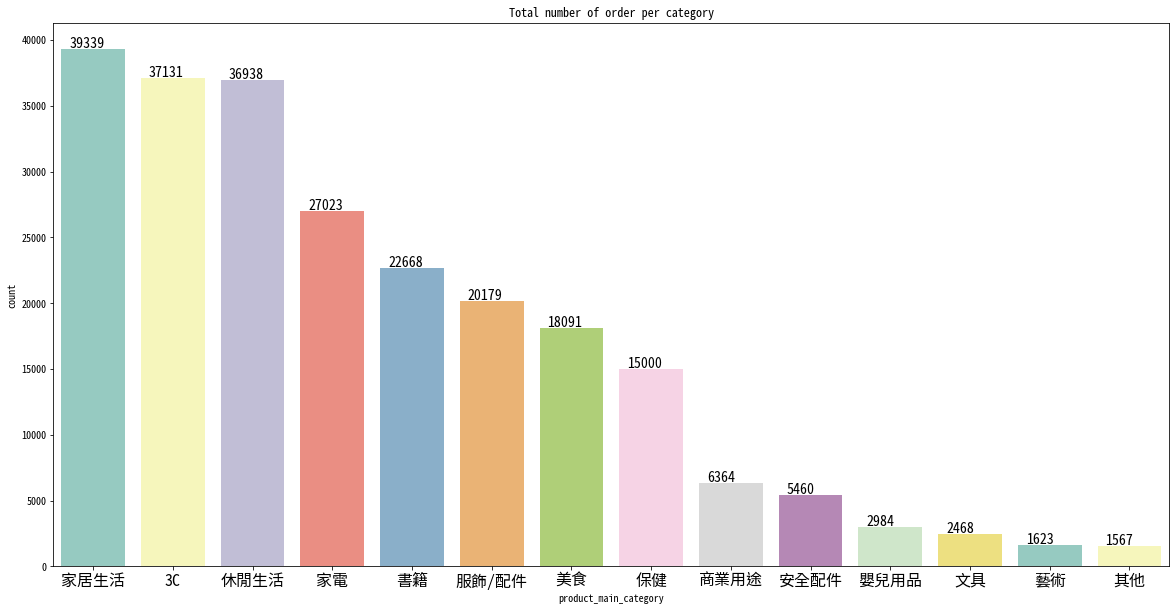

In [10]:
# visualize
plt.figure(figsize=(20, 10))
ax = sns.countplot(x="product_main_category",
                   data=purchase_data,
                   order=purchase_data['product_main_category'].value_counts().sort_values(ascending=False).index,
                   palette='Set3')
plt.xticks(fontsize=16)
plt.title("Total number of order per category")

# labels values
for p in ax.patches:
    value = int(p.get_height())
    x = p.get_x() + (p.get_width() / 2) - 0.3
    y = p.get_y() + p.get_height() + 100
    ax.text(x, y, str(value), fontsize=14)

print("Total main categories: ", len(purchase_data['product_main_category'].unique()))

### Customer Analysis Input

In [11]:
analysis_input.head()

,customer_unique_id,sum_payment_count_boleto,sum_payment_count_creditcard,sum_payment_count_others,avg_credit_card_installments,avg_review_score,sum_review_comment_message,avg_receive_waiting_day,avg_review_waiting_day,item_count,...,total_price_安全配件,total_price_家居生活,total_price_家電,total_price_文具,total_price_書籍,total_price_服飾/配件,total_price_美食,total_price_藝術,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,8.0,5.0,1,6.411227,11.116910,1,...,0.00,129.90,0.00,0.0,0.0,0.0,0.0,0.0,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1.0,0.0,1.0,4.0,0,3.285590,4.470810,2,...,0.00,0.00,0.00,0.0,125.0,0.0,0.0,0.0,osasco,SP
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,8.0,3.0,0,25.731759,27.176863,3,...,0.00,0.00,0.00,69.0,44.9,0.0,0.0,0.0,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,0.0,4.0,4.0,1,20.037083,21.158449,2,...,0.00,99.99,25.99,0.0,0.0,0.0,0.0,0.0,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,6.0,5.0,0,13.141134,18.113808,3,...,84.99,0.00,180.00,0.0,0.0,0.0,0.0,0.0,sorocaba,SP


In [12]:
analysis_input.describe()

,sum_payment_count_boleto,sum_payment_count_creditcard,sum_payment_count_others,avg_credit_card_installments,avg_review_score,sum_review_comment_message,avg_receive_waiting_day,avg_review_waiting_day,item_count,total_price,...,total_price_商業用途,total_price_嬰兒用品,total_price_安全配件,total_price_家居生活,total_price_家電,total_price_文具,total_price_書籍,total_price_服飾/配件,total_price_美食,total_price_藝術
count,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,...,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000,93350.000000
mean,0.205581,0.798918,0.074751,2.694183,4.139025,0.427392,12.567474,15.467491,2.537065,408.601334,...,14.518543,4.291544,7.200275,51.167525,56.641391,2.399073,20.817641,22.947084,17.039779,8.217851
std,0.418197,0.473426,0.449204,2.898491,1.292313,0.518471,9.546171,12.314014,1.862507,667.409091,...,99.259800,45.457583,38.778271,136.619537,214.870598,20.382668,64.151894,69.860800,52.621963,213.938831
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.533414,-32.859687,1.000000,0.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,4.000000,0.000000,6.788001,9.153166,1.000000,95.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,10.234248,13.206713,2.000000,207.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,4.000000,5.000000,1.000000,15.717986,19.141209,3.000000,447.987500,...,0.000000,0.000000,0.000000,56.990000,12.970000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,15.000000,33.000000,24.000000,5.000000,5.000000,209.628611,528.129444,42.000000,13931.280000,...,5934.600000,3899.000000,2919.400000,6735.000000,13440.000000,1727.000000,1174.850000,2179.000000,2849.900000,6499.000000


In [13]:
analysis_input_des = pd.DataFrame(analysis_input.describe())
analysis_input_des.transpose()

,count,mean,std,min,25%,50%,75%,max
sum_payment_count_boleto,93350.0,0.205581,0.418197,0.000000,0.000000,0.000000,0.000000,6.000000
sum_payment_count_creditcard,93350.0,0.798918,0.473426,0.000000,1.000000,1.000000,1.000000,15.000000
sum_payment_count_others,93350.0,0.074751,0.449204,0.000000,0.000000,0.000000,0.000000,33.000000
avg_credit_card_installments,93350.0,2.694183,2.898491,0.000000,1.000000,2.000000,4.000000,24.000000
avg_review_score,93350.0,4.139025,1.292313,1.000000,4.000000,5.000000,5.000000,5.000000
sum_review_comment_message,93350.0,0.427392,0.518471,0.000000,0.000000,0.000000,1.000000,5.000000
avg_receive_waiting_day,93350.0,12.567474,9.546171,0.533414,6.788001,10.234248,15.717986,209.628611
avg_review_waiting_day,93350.0,15.467491,12.314014,-32.859687,9.153166,13.206713,19.141209,528.129444
item_count,93350.0,2.537065,1.862507,1.000000,1.000000,2.000000,3.000000,42.000000
total_price,93350.0,408.601334,667.409091,0.850000,95.150000,207.990000,447.987500,13931.280000


In [14]:
analysis_input.columns

Index(['customer_unique_id', 'sum_payment_count_boleto',
       'sum_payment_count_creditcard', 'sum_payment_count_others',
       'avg_credit_card_installments', 'avg_review_score',
       'sum_review_comment_message', 'avg_receive_waiting_day',
       'avg_review_waiting_day', 'item_count', 'total_price', 'item_count_3C',
       'item_count_休閒生活', 'item_count_保健', 'item_count_其他', 'item_count_商業用途',
       'item_count_嬰兒用品', 'item_count_安全配件', 'item_count_家居生活',
       'item_count_家電', 'item_count_文具', 'item_count_書籍', 'item_count_服飾/配件',
       'item_count_美食', 'item_count_藝術', 'total_price_3C', 'total_price_休閒生活',
       'total_price_保健', 'total_price_其他', 'total_price_商業用途',
       'total_price_嬰兒用品', 'total_price_安全配件', 'total_price_家居生活',
       'total_price_家電', 'total_price_文具', 'total_price_書籍',
       'total_price_服飾/配件', 'total_price_美食', 'total_price_藝術',
       'customer_city', 'customer_state'],
      dtype='object')

In [15]:
analysis_input_item = analysis_input[[
    'item_count_3C',
    'item_count_休閒生活', 'item_count_保健', 'item_count_其他', 'item_count_商業用途',
    'item_count_嬰兒用品', 'item_count_安全配件', 'item_count_家居生活',
    'item_count_家電', 'item_count_文具', 'item_count_書籍', 'item_count_服飾/配件',
    'item_count_美食', 'item_count_藝術',
]]

analysis_input_item

,item_count_3C,item_count_休閒生活,item_count_保健,item_count_其他,item_count_商業用途,item_count_嬰兒用品,item_count_安全配件,item_count_家居生活,item_count_家電,item_count_文具,item_count_書籍,item_count_服飾/配件,item_count_美食,item_count_藝術
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93345,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
93346,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93347,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
93348,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
corr = analysis_input_item.corr()
corr

,item_count_3C,item_count_休閒生活,item_count_保健,item_count_其他,item_count_商業用途,item_count_嬰兒用品,item_count_安全配件,item_count_家居生活,item_count_家電,item_count_文具,item_count_書籍,item_count_服飾/配件,item_count_美食,item_count_藝術
item_count_3C,1.000000,0.427038,-0.113140,-0.060901,-0.022389,-0.094492,-0.004613,-0.234995,-0.169508,-0.082124,0.010611,0.186163,-0.010635,-0.071936
item_count_休閒生活,0.427038,1.000000,-0.092991,-0.058603,-0.018746,-0.086854,-0.003231,-0.211834,-0.146955,-0.077814,0.020930,0.559547,-0.012683,-0.068295
item_count_保健,-0.113140,-0.092991,1.000000,-0.031707,0.008794,-0.045245,0.016226,-0.081235,-0.049598,-0.031375,0.552083,-0.083221,0.309629,-0.026762
item_count_其他,-0.060901,-0.058603,-0.031707,1.000000,-0.005430,-0.018526,-0.002295,-0.043415,-0.036099,-0.013342,-0.008320,-0.046014,-0.004203,-0.013569
item_count_商業用途,-0.022389,-0.018746,0.008794,-0.005430,1.000000,-0.015638,0.844064,0.019145,0.023566,-0.008838,0.030706,-0.026702,0.010206,-0.007963
item_count_嬰兒用品,-0.094492,-0.086854,-0.045245,-0.018526,-0.015638,1.000000,-0.012775,-0.075566,-0.064118,-0.023838,-0.021275,-0.070267,-0.019284,-0.021880
item_count_安全配件,-0.004613,-0.003231,0.016226,-0.002295,0.844064,-0.012775,1.000000,0.033419,0.035495,-0.004768,0.031668,-0.014444,0.010488,-0.004333
item_count_家居生活,-0.234995,-0.211834,-0.081235,-0.043415,0.019145,-0.075566,0.033419,1.000000,0.706353,-0.065132,0.065838,-0.189661,0.050301,-0.058236
item_count_家電,-0.169508,-0.146955,-0.049598,-0.036099,0.023566,-0.064118,0.035495,0.706353,1.000000,-0.049803,0.070980,-0.135516,0.052880,-0.044746
item_count_文具,-0.082124,-0.077814,-0.031375,-0.013342,-0.008838,-0.023838,-0.004768,-0.065132,-0.049803,1.000000,-0.012938,-0.065116,-0.016407,0.720979


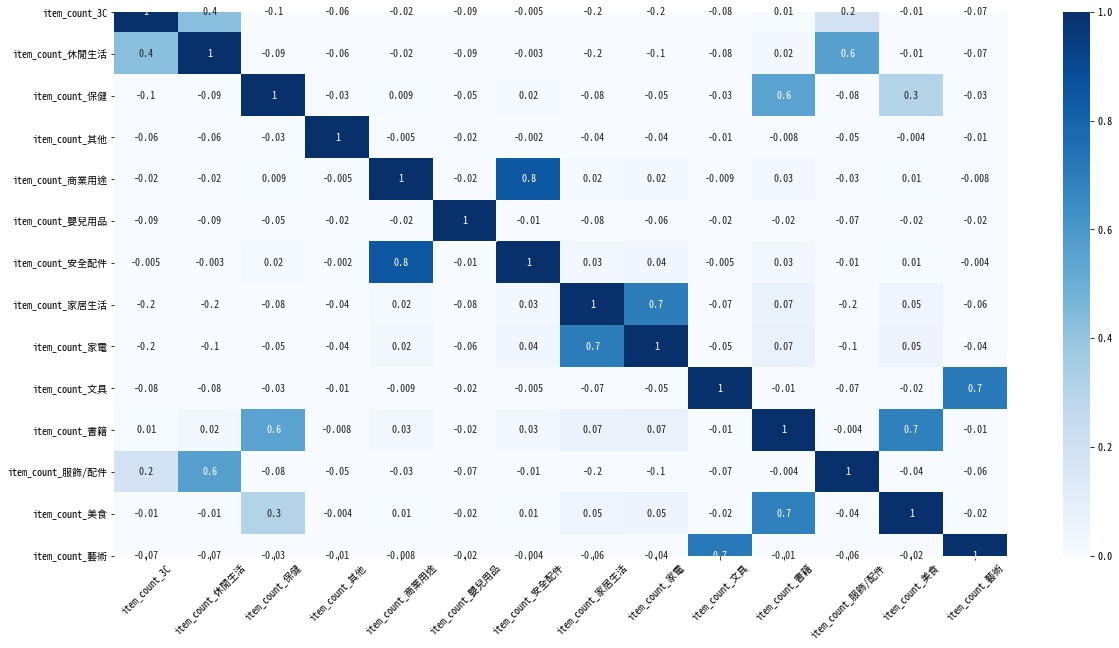

In [17]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, cmap="Blues", vmin=0.0, vmax=1.0, annot=True, fmt ='0.1g') 
plt.xticks(rotation=45)
plt.show()